### Question 1:  MNIST dataset (20)

This dataset consists of images of handwritten digits (0-9), and the task is to classify each image into the appropriate digit category. 

In [114]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
digits = datasets.load_digits()

# Split the data into features (X) and labels (y)
X = digits.data
y = digits.target

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

1. Split the data into training and testing data, each with 50% and use the random_state as 5220. Use the K = 5 in the KNN and print the accuracy. 

In [115]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5220)
k=5

knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy without scaling:", accuracy)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_model1 = KNeighborsClassifier(n_neighbors=k)
knn_model1.fit(X_train_scaled, y_train)

y_pred1 = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy with scaling:", accuracy)




Accuracy without scaling: 0.9799777530589544
Accuracy with scaling: 0.4883203559510567


### Question 2:  KNN with regression (40)

Following is a simulation data with three features. 

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=3, noise=20, random_state=5220)
y = y + np.sin(X[:, 0] * 3) + X[:, 1] ** 2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5220)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



1. Fit a KNN model. Tune the parameter of K and distance metric (Euclidean and Manhattan). Print the MSE with the best parameter. (20) 

In [117]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error


# Define the parameter grid for tuning
param_grid = {'n_neighbors': range(1,26),
              'metric': ['euclidean', 'manhattan']}

# Fit KNN model with grid search for parameter tuning
knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Fit KNN model with the best parameters
best_knn_regressor = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
best_knn_regressor.fit(X_train_scaled, y_train)

y_pred1 = best_knn_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error:", mse)






Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5}
Best Score: 0.9200838289251372
Mean Squared Error: 650.5991705065901


In [118]:
len(X_test_scaled)

200

In [119]:
len(y_test)

200

In [120]:
len(y_pred1)

200

2. Plot and compare the true and predicted values. You can plot two figures, one with the first feature and y value, the other one with the second feature and y value. (15)

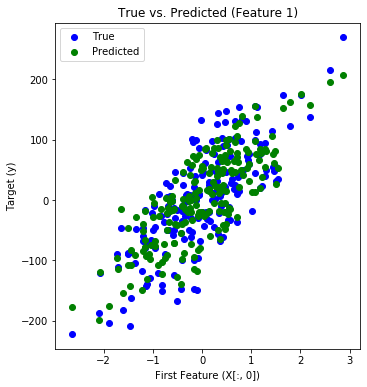

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test_scaled[:, 0], y_test, c='b', label='True')
plt.scatter(X_test_scaled[:, 0], y_pred1, c='g',marker='o', label='Predicted')
plt.xlabel('First Feature (X[:, 0])')
plt.ylabel('Target (y)')
plt.title('True vs. Predicted (Feature 1)')
plt.legend()


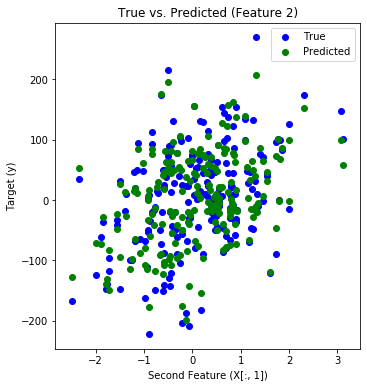

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test_scaled[:, 1], y_test, c='b', label='True')
plt.scatter(X_test_scaled[:, 1], y_pred1, c='g',marker='o', label='Predicted')
plt.xlabel('Second Feature (X[:, 1])')
plt.ylabel('Target (y)')
plt.title('True vs. Predicted (Feature 2)')
plt.legend()


In [ ]:
#We get better predictions for feature 1 compared to feature 2.

3. Repeat the simulation process (part 1 and 2) with the number of feature equal to 10. (15)

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=20, random_state=5220)
y = y + np.sin(X[:, 0] * 3) + X[:, 1] ** 2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5220)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [124]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error


# Define the parameter grid for tuning
param_grid = {'n_neighbors': range(1,26),
              'metric': ['euclidean', 'manhattan']}

# Fit KNN model with grid search for parameter tuning
knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Fit KNN model with the best parameters
best_knn_regressor = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
best_knn_regressor.fit(X_train_scaled, y_train)
y_pred = best_knn_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)






Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5}
Best Score: 0.7772512846364165
Mean Squared Error: 8928.452330656846


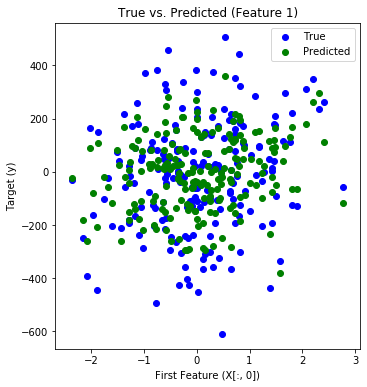

In [125]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test_scaled[:, 0], y_test, c='b', label='True')
plt.scatter(X_test_scaled[:, 0], y_pred, c='g',marker='o', label='Predicted')
plt.xlabel('First Feature (X[:, 0])')
plt.ylabel('Target (y)')
plt.title('True vs. Predicted (Feature 1)')
plt.legend()


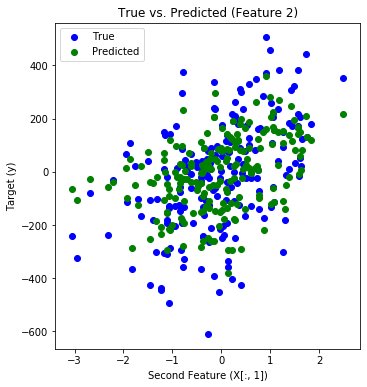

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test_scaled[:, 1], y_test, c='b', label='True')
plt.scatter(X_test_scaled[:, 1], y_pred, c='g',marker='o', label='Predicted')
plt.xlabel('Second Feature (X[:, 1])')
plt.ylabel('Target (y)')
plt.title('True vs. Predicted (Feature 2)')
plt.legend()


### Question 3: Implement KNN algorithm (40)

In the code demonstration, we show you how to use the KNN function in the sklearn. However, KNN is also easy to implement. Try to complete the the following code to implement the KNN algorithm and verify with the simulaiton data. 

In [132]:
import numpy as np
from collections import Counter

# Define the KNN function with L2 (Euclidean) distance
def knn_predict(X_train, y_train, X_test, k=5):
    y_pred = []
    for x in X_test:
        #Considering Euclidean distance
        distances = [np.linalg.norm(x - x_train) for x_train in X_train]
        
        
        indices = np.argsort(distances)[:k]
        
       
        k_nearest_labels = [y_train[i] for i in indices]
        
       
        unique_label, counts = np.unique(k_nearest_labels, return_counts=True)
        most_common = unique_label[np.argmax(counts)]
        y_pred.append(most_common)
    
    return np.array(y_pred)


In [133]:
# Generate random simulation data
np.random.seed(5220)
X = np.random.rand(100, 2)  # 100 data points with 2 features
y = np.random.choice([0, 1], size=100)  # Binary classification labels

# Split the data into training and testing sets (70% train, 30% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5220)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [134]:

k = 5  # Set the number of neighbors
y_pred = knn_predict(X_train, y_train, X_test, k)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test) * 100
print(f"Accuracy Using our function: {accuracy:.2f}%")

Accuracy Using our function: 63.33%


In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Make predictions using KNN
k_value = 5

# Evaluate the accuracy of the model
knn_model1 = KNeighborsClassifier(n_neighbors=k_value)
knn_model1.fit(X_train_scaled, y_train)
y_pred1 = knn_model1.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy on the test data using model: {accuracy}")

Accuracy on the test data using model: 0.6333333333333333
